Names: Binbin Xu, Hanh (Happy) Han, Quiana Ma

Last saved: June 7, 2023 at 3:55 PM

In [4]:
import numpy as np
from numpy import random 
import pandas as pd
import simpleaudio as sa
from matplotlib import pyplot as plt

Functions for tone and sounds

In [5]:
def make_tone(f,duration,sr = 44100,ramp = 200):
    time_vec = np.linspace(0, duration, int(duration*sr)) # The number of samples is the length of time X sampling rate.
    tone = np.sin(f * time_vec  * 2 * np.pi)
    risingramp = np.linspace(0,1,ramp)
    descendingramp = np.linspace(1,0,ramp)
    tone[0:ramp] = tone[0:ramp]*risingramp
    tone[-ramp:] = tone[-ramp:]*descendingramp
    return tone

In [6]:
def play_sound(tone,volume = 0.5,sr = 44100):
    tone  = tone*32768 / np.max(np.abs(tone)) # scale to the range of the sound card.  
    tone = volume*tone # FOR SAFETY.  PLEASE LIMIT THE MAXIMIM VOLUME! 
    tone  = tone.astype(np.int16) # convert to 16 bit integers. 
    play_obj = sa.play_buffer(tone , 1, 2, sr) # i created an object here. 
    play_obj.wait_done() # tells python to wait for the sound to finish before going any further.  

Variables

In [4]:
#rng = random.default_rng(seed = 15) #change to subject id? (seed needs to be integer)

In [49]:
subjid = '1' #your the first subject! #input so experimenter types in subject id
ncond = 2 
ntrials = 50
fA = 1760 #might change to input for 440, 880, and 1760
df = 0.1*fA
fB = fA + df
duration = 0.5 
volume = 0.5
silent_interval = 0.25 # silent interval between the two notes
sr = 44100
filename = 'Experiment Data' + subjid + '.csv' #if you prefer a csv file 

In [50]:
rng = random.default_rng(seed = int(subjid)) #change to subject id? (seed needs to be integer)

Play sounds and silences

In [51]:
A_note = make_tone(fA,duration)
B_note = make_tone(fB,duration)
silence = np.zeros(int(silent_interval*sr))
#play_sound(A_note,volume = volume)
#play_sound(B_note,volume = volume)

Creating Arrays for Table Columns


In [52]:
correct_response = np.zeros(ntrials,dtype = 'int') #empty array to hold the trial labels
trial_response = np.array(np.zeros(ntrials),dtype = 'int') #empty array to hold the responses of trype string
trial_result = np.array(np.zeros(ntrials),dtype = 'str')
difference = np.array(np.zeros(ntrials),dtype = 'str')


Running the **actual** Experiment with for loop

In [53]:
total_error = 0
consecutive_correct = 0


condition_order = rng.integers(0,2,ntrials)
for j in range(ntrials):  
    #is response 1 or 2 or invalid
    if condition_order[j] == 0: 
        stimulus = np.concatenate((A_note,silence,B_note))
        play_sound(stimulus,volume=volume)
        correct_response[j] = 2
    else:
        stimulus = np.concatenate((B_note,silence,A_note))
        play_sound(stimulus,volume=volume)
        correct_response[j] = 1
    response_check = False 
    while response_check == False: 
        response = input('Is the first or 2nd note higher') #Get a keyboard input
        if (response =='1') | (response == '2'): #check if its an a or b 
            response_check = True #if it is update response_check to true 
            print(response) # print the response 
            trial_response[j] = response # the jth trial response is response
        else:
            print('Invalid Response Try Again')
    #is subject response = correct response
    if trial_response[j] == correct_response[j]:
        consecutive_correct += 1
        trial_result[j] = 'correct'
        difference[j] = df
    else:
        total_error += 1
        consecutive_correct = 0
        difference[j] = df
        df*=np.sqrt(2) #this becomes larger since it was a wrong answer
        fB = fA + df
        trial_result[j] = 'wrong'
    if consecutive_correct == 2:
        df/=np.sqrt(2)
        fB = fA + df
        consecutive_correct = 0     
    if total_error>3:
        break #break --> force end for loop
    B_note = make_tone(fB,duration)
    

print('Done!')
2

2
1
1
1
2
2
1
1
2
2
1
2
2
1
1
2
1
1
2
2
1
1
1
1
1
1
1
1
1
Done!


2

TRAINING EXPERIMENT

variables

In [35]:
subjid = '1' #your the first subject! #input so experimenter types in subject id
ncond = 2 
ntrials = 5
fA = 1760 #might change to input for 440, 880, and 1760
df = 0.1*fA
fB = fA + df
duration = 0.5 
volume = 0.5
silent_interval = 0.25 # silent interval between the two notes
sr = 44100
filename = 'training' + str(fA) + subjid + '.csv' #if you prefer a csv file 
#filename = 'Experiment Data' + subjid + '.xlsx' # if you prefer an excel file 

In [36]:
rng = random.default_rng(seed = int(subjid)) #change to subject id? (seed needs to be integer)

In [37]:
A_note = make_tone(fA,duration)
B_note = make_tone(fB,duration)
silence = np.zeros(int(silent_interval*sr))
#play_sound(A_note,volume = volume)
#play_sound(B_note,volume = volume)

In [38]:
correct_response = np.zeros(ntrials,dtype = 'int') #empty array to hold the trial labels
trial_response = np.array(np.zeros(ntrials),dtype = 'int') #empty array to hold the responses of trype string
trial_result = np.array(np.zeros(ntrials),dtype = 'str')
difference = np.array(np.zeros(ntrials),dtype = 'str')


running training trial

In [39]:
condition_order = rng.integers(0,2,ntrials)
for j in range(5):  #loop over trials, index is j
    #is response 1 or 2 or invalid
    if condition_order[j] == 0: #check the trial type for jth trial
        stimulus = np.concatenate((A_note,silence,B_note))
        play_sound(stimulus,volume=volume)
        correct_response[j] = 2
    else:
        stimulus = np.concatenate((B_note,silence,A_note))
        play_sound(stimulus,volume=volume)
        correct_response[j] = 1
    response_check = False #I set the response_check to false.  I will only change response_check if i get a valid response 
    while response_check == False: # This while loop runs until I get a valid response 
        response = input('Is the first or 2nd note higher') #Get a keyboard input
        if (response =='1') | (response == '2'): #check if its an a or b 
            response_check = True #if it is update response_check to true 
            print(response) # print the response 
            trial_response[j] = response # the jth trial response is response
        else:
            print('Invalid Response Try Again')
    if trial_response[j] == correct_response[j]:
            trial_result[j] = 'correct'
            difference[j] = df
    else:
        trial_result[j] = 'wrong'
        difference[j] = df

print('Done!')

2
1
1
1
2
Done!


In [54]:
data = pd.DataFrame(columns = ['Condition','Response','Correct_Response','Result']) #create an empty data frame with three columns with column labels given
data['Condition'] = condition_order #place trial_order in the 'Condition' column
data['note_difference'] = difference
data['Response'] = trial_response #place trial_response in the 'Response' column
data['Correct_Response'] = correct_response
data['Result'] = trial_result

In [55]:
data.to_csv(filename) #write it out to a csv file 

In [15]:
condition_order = rng.integers(0,2,ntrials)

for j in range(ntrials):  #loop over trials, index is j
    #is response 1 or 2 or invalid
    if condition_order[j] == 0: #check the trial type for jth trial
        stimulus = np.concatenate((A_note,silence,B_note))
        play_sound(stimulus,volume=volume)
        correct_response[j] = 2
    else: #if it generates 1
        stimulus = np.concatenate((B_note,silence,A_note))
        play_sound(stimulus,volume=volume)
        correct_response[j] = 1
    response_check = False #I set the response_check to false.  I will only change response_check if i get a valid response 
    while response_check == False: # This while loop runs until I get a valid response 
        response = input('Is the first or 2nd note higher') #Get a keyboard input
        if (response =='1') | (response == '2'): #check if its an a or b 
            response_check = True #if it is update response_check to true 
            print(response) # print the response 
            trial_response[j] = response # the jth trial response is response
        else:
            print('Invalid Response Try Again')
    if trial_response[j] == correct_response[j]:
            trial_result[j] = 'correct'
            difference[j] = df
    else:
        trial_result[j] = 'wrong'
        difference[j] = df

print('Done!')

Invalid Response Try Again
Invalid Response Try Again
Invalid Response Try Again
Invalid Response Try Again
Invalid Response Try Again
Invalid Response Try Again
Invalid Response Try Again
Invalid Response Try Again
Invalid Response Try Again
Invalid Response Try Again
Invalid Response Try Again
Invalid Response Try Again
Invalid Response Try Again
Invalid Response Try Again
1
1
1
1
1
Done!


Putting all the data into a table

In [16]:
data = pd.DataFrame(columns = ['Condition','Response','Correct_Response','Result']) #create an empty data frame with three columns with column labels given
data['Condition'] = condition_order #place condition_order in the 'Condition' column
data['note_difference'] = difference
data['Response'] = trial_response #place trial_response in the 'Response' column
data['Correct_Response'] = correct_response
data['Result'] = trial_result

ValueError: Length of values (50) does not match length of index (5)

In [17]:
data.to_csv(filename) #write it out to a csv file 

Training Trial

Graphs

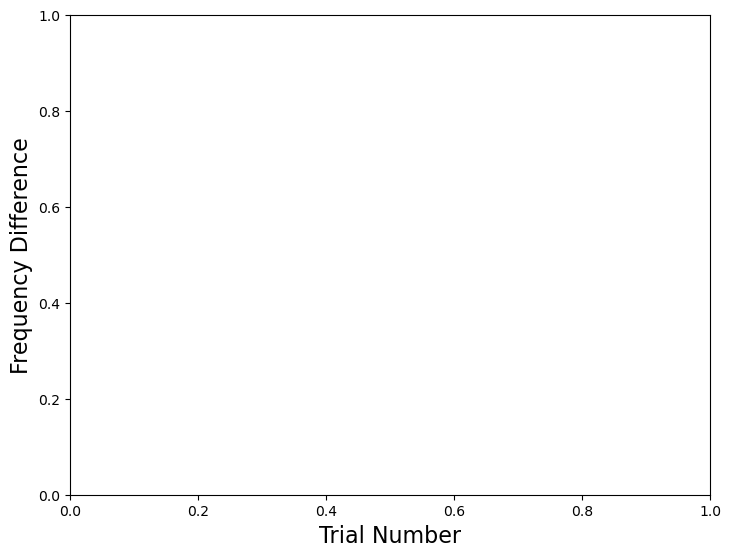

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Trial Number',fontsize = 16)
ax.set_ylabel('Frequency Difference',fontsize = 16)
plt.show()
#the trials would come first in dashed form, and then continue with the color for the specific df

In [54]:
#df*=np.sqrt(2) #this becomes larger since it was a wrong answer
#fB = fA + df
#trial_result[j] = 'wrong'
#difference[j] = df

#df = 0.1*fA
#df/=100000
#fB = fA + df
#consecutive_correct = 0

#print(fA)
#print(fB)
#B_note = make_tone(fB,duration)
#play_sound(B_note,volume = volume)
#play_sound(A_note,volume = volume)


440
440.00044
